## San Francisco Crime Classification

https://www.kaggle.com/c/sf-crime

Description:

"From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

We're also encouraging you to explore the dataset visually. What can we learn about the city through visualizations like this Top Crimes Map? The top most up-voted scripts from this competition will receive official Kaggle swag as prizes."

## Set Up, Initial Exploration

Imports, set options.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# enables inline plots
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

Load dataset. Take a look at the columns.


From Kaggle documentation:

Dates - timestamp of the crime incident

Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.

Descript - detailed description of the crime incident (only in train.csv)

DayOfWeek - the day of the week

PdDistrict - name of the Police Department District

Resolution - how the crime incident was resolved (only in train.csv)

Address - the approximate street address of the crime incident 

X - Longitude

Y - Latitude

In [2]:
df = pd.read_csv("/Users/eloiseheydenrych/Downloads/train-small.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 9 columns):
Dates         1890 non-null object
Category      1890 non-null object
Descript      1890 non-null object
DayOfWeek     1890 non-null object
PdDistrict    1890 non-null object
Resolution    1890 non-null object
Address       1890 non-null object
X             1890 non-null float64
Y             1890 non-null float64
dtypes: float64(2), object(7)
memory usage: 147.7+ KB


View first 10 rows.

In [3]:
df.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,1/12/2003 19:35,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,INGLESIDE,NONE,2900 Block of ALEMANY BL,-122.452,37.712
1,1/12/2003 19:35,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,SOUTHERN,"ARREST, CITED",MISSION ST / LASKIE ST,-122.414,37.777
2,1/12/2003 19:35,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Sunday,RICHMOND,NONE,700 Block of FUNSTON AV,-122.471,37.774
3,1/12/2003 19:30,DRUG/NARCOTIC,SALE OF COCAINE,Sunday,MISSION,"ARREST, BOOKED",24TH ST / ALABAMA ST,-122.411,37.753
4,1/12/2003 19:30,WARRANTS,WARRANT ARREST,Sunday,MISSION,"ARREST, BOOKED",24TH ST / ALABAMA ST,-122.411,37.753
5,1/12/2003 19:30,BURGLARY,"BURGLARY OF HOTEL ROOM, UNLAWFUL ENTRY",Sunday,SOUTHERN,NONE,0 Block of THE EMBARCADERO NORTH ST,-122.388,37.783
6,1/12/2003 19:28,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,INGLESIDE,NONE,400 Block of MARIETTA DR,-122.445,37.738
7,1/12/2003 19:20,MISSING PERSON,MISSING JUVENILE,Sunday,INGLESIDE,NONE,300 Block of CAMBRIDGE ST,-122.419,37.727
8,1/12/2003 19:20,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,NORTHERN,NONE,1400 Block of WEBSTER ST,-122.431,37.784
9,1/12/2003 19:15,DRUG/NARCOTIC,TRANSPORTATION OF METH-AMPHETAMINE,Sunday,BAYVIEW,"ARREST, BOOKED",EVANS AV / SELBY ST,-122.394,37.746


Drop Descript and Resolution columns, since those aren't provided in the test data.

In [4]:
del df['Descript']
del df['Resolution']
df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,1/12/2003 19:35,VANDALISM,Sunday,INGLESIDE,2900 Block of ALEMANY BL,-122.452,37.712
1,1/12/2003 19:35,OTHER OFFENSES,Sunday,SOUTHERN,MISSION ST / LASKIE ST,-122.414,37.777
2,1/12/2003 19:35,BURGLARY,Sunday,RICHMOND,700 Block of FUNSTON AV,-122.471,37.774
3,1/12/2003 19:30,DRUG/NARCOTIC,Sunday,MISSION,24TH ST / ALABAMA ST,-122.411,37.753
4,1/12/2003 19:30,WARRANTS,Sunday,MISSION,24TH ST / ALABAMA ST,-122.411,37.753


What are our the different crime categories?

In [5]:
CategoryList = df.Category.unique()
print CategoryList

['VANDALISM' 'OTHER OFFENSES' 'BURGLARY' 'DRUG/NARCOTIC' 'WARRANTS'
 'NON-CRIMINAL' 'MISSING PERSON' 'LARCENY/THEFT' 'SUSPICIOUS OCC' 'FRAUD'
 'ASSAULT' 'ROBBERY' 'SEX OFFENSES FORCIBLE' 'VEHICLE THEFT' 'ARSON'
 'TRESPASS' 'FORGERY/COUNTERFEITING' 'SECONDARY CODES' 'DRUNKENNESS'
 'EMBEZZLEMENT' 'DRIVING UNDER THE INFLUENCE' 'WEAPON LAWS' 'KIDNAPPING'
 'STOLEN PROPERTY' 'RUNAWAY' 'PROSTITUTION' 'DISORDERLY CONDUCT'
 'BAD CHECKS' 'LIQUOR LAWS' 'LOITERING']


How many entries fall into each category?

In [6]:
df.Category.value_counts()

OTHER OFFENSES                 317
LARCENY/THEFT                  294
VEHICLE THEFT                  172
ASSAULT                        162
DRUG/NARCOTIC                  158
NON-CRIMINAL                   151
WARRANTS                       135
VANDALISM                       90
BURGLARY                        69
MISSING PERSON                  50
                              ... 
SEX OFFENSES FORCIBLE           10
STOLEN PROPERTY                  9
DRIVING UNDER THE INFLUENCE      8
EMBEZZLEMENT                     5
ARSON                            5
RUNAWAY                          4
BAD CHECKS                       3
KIDNAPPING                       2
LOITERING                        1
LIQUOR LAWS                      1
Name: Category, dtype: int64

Are there any nulls?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 7 columns):
Dates         1890 non-null object
Category      1890 non-null object
DayOfWeek     1890 non-null object
PdDistrict    1890 non-null object
Address       1890 non-null object
X             1890 non-null float64
Y             1890 non-null float64
dtypes: float64(2), object(5)
memory usage: 118.1+ KB


Nope, yay.

What days of the week did most of the crimes occur on?

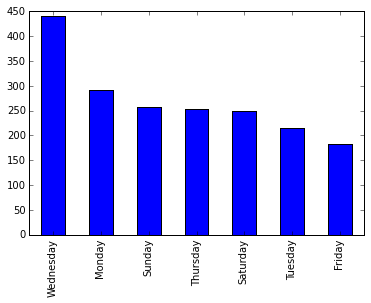

In [8]:
df['DayOfWeek'].value_counts().plot(kind = 'bar')

How are the crime entries distributed across the police districts?

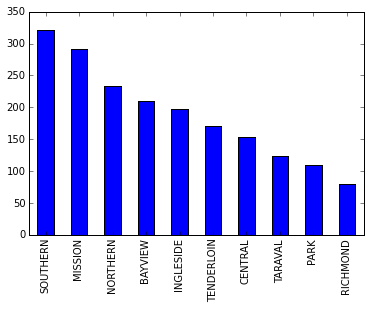

In [9]:
df['PdDistrict'].value_counts().plot('bar')

# Date Column
Use pd.to_datetime() to explicitly cast strings in our Date column.

In [10]:
df['Dates'] = pd.to_datetime(df['Dates'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 7 columns):
Dates         1890 non-null datetime64[ns]
Category      1890 non-null object
DayOfWeek     1890 non-null object
PdDistrict    1890 non-null object
Address       1890 non-null object
X             1890 non-null float64
Y             1890 non-null float64
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 118.1+ KB


Use datetime method to create an Hour feature. Note that we already have a DayOfWeek column. Drop Dates column for now, but note that it may be interesting to come back and try some different Dates-based features, like Month or Season, as there may be seasonal variation in crimes. Features like IsWorkday or IsBusinessHours may also be interesting.

In [11]:
df['Hour'] = df.Dates.dt.hour
del df['Dates']
df.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,Hour
0,VANDALISM,Sunday,INGLESIDE,2900 Block of ALEMANY BL,-122.452,37.712,19
1,OTHER OFFENSES,Sunday,SOUTHERN,MISSION ST / LASKIE ST,-122.414,37.777,19
2,BURGLARY,Sunday,RICHMOND,700 Block of FUNSTON AV,-122.471,37.774,19
3,DRUG/NARCOTIC,Sunday,MISSION,24TH ST / ALABAMA ST,-122.411,37.753,19
4,WARRANTS,Sunday,MISSION,24TH ST / ALABAMA ST,-122.411,37.753,19


How are crimes distributed by hour of day?

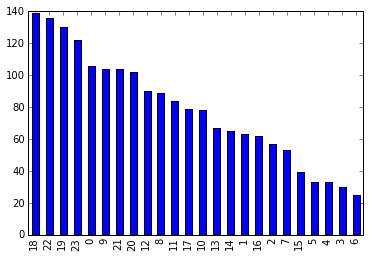

In [12]:
df['Hour'].value_counts().plot('bar')

# Dummy Variables
Create a new temporary dataframe by calling get_dummies() on the DayOfWeek column to create dummy variables for each of the 7 values. Then, merge the new dummy columns into the original dataset and get rid of the original DayOfWeek column which we no longer need. We're going to treat Friday as our baseline and exclude it from our fit, to prevent multicollinearity. Repeat process for PdDistrict (where we drop the Southern district) and for Hour of Day (where we drop hour 18).

In [13]:
dummy_DayOfWeek = pd.get_dummies(df['DayOfWeek'], prefix='Day')
del dummy_DayOfWeek['Day_Friday']
del df['DayOfWeek']
df = df.join(dummy_DayOfWeek)
dummy_PdDistrict = pd.get_dummies(df['PdDistrict'], prefix='District')
del dummy_PdDistrict['District_SOUTHERN']
del df['PdDistrict']
df = df.join(dummy_PdDistrict)
dummy_Hour = pd.get_dummies(df['Hour'], prefix='Hour')
del dummy_Hour['Hour_18']
del df['Hour']
df = df.join(dummy_Hour)

df.head()

,Category,Address,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,VANDALISM,2900 Block of ALEMANY BL,-122.452,37.712,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,OTHER OFFENSES,MISSION ST / LASKIE ST,-122.414,37.777,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,BURGLARY,700 Block of FUNSTON AV,-122.471,37.774,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,DRUG/NARCOTIC,24TH ST / ALABAMA ST,-122.411,37.753,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,WARRANTS,24TH ST / ALABAMA ST,-122.411,37.753,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Take a closer look at the Address column.

In [14]:
AddressList = df.Address.unique()
print len(AddressList)
print df.Address.value_counts()

1173
800 Block of BRYANT ST            21
0 Block of 6TH ST                 13
0 Block of UNITED NATIONS PZ      13
17TH ST / SHOTWELL ST             13
0 Block of TURK ST                11
2000 Block of MISSION ST          10
800 Block of MARKET ST            10
1000 Block of POTRERO AV          10
1000 Block of MARKET ST            9
16TH ST / MISSION ST               8
                                  ..
300 Block of JOHN F KENNEDY DR     1
3500 Block of CESAR CHAVEZ ST      1
300 Block of LAGUNA HONDA BL       1
2000 Block of CHESTNUT ST          1
2200 Block of UNION ST             1
1100 Block of HOLLOWAY AV          1
2900 Block of ALEMANY BL           1
200 Block of OCEAN AV              1
300 Block of 20TH AV               1
SUTTER ST / LARKIN ST              1
Name: Address, dtype: int64


There are 23228 different addresses in our data, making this column difficult to work with (dummy variables infeasible, for example). Additionally, the information is mostly already captured in the longitude and latitude columns (X and Y). So, take the Address column out of our data, at least for now.

In [15]:
del df['Address']
df.head()

,Category,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,VANDALISM,-122.452,37.712,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,OTHER OFFENSES,-122.414,37.777,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,BURGLARY,-122.471,37.774,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,DRUG/NARCOTIC,-122.411,37.753,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,WARRANTS,-122.411,37.753,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Target Vector and Feature Matrix

In [16]:
#target vector y
y = df['Category']
y.head()

0         VANDALISM
1    OTHER OFFENSES
2          BURGLARY
3     DRUG/NARCOTIC
4          WARRANTS
Name: Category, dtype: object

In [17]:
#Matrix of X's.
X = df
del X['Category']
X.head()

,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,-122.452,37.712,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-122.414,37.777,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-122.471,37.774,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-122.411,37.753,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-122.411,37.753,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## k-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Use grid search to find the optimal value of k.

In [19]:
from sklearn.grid_search import GridSearchCV
k_range = range(1, 51, 2)
param_grid = {'n_neighbors' : k_range}
grid = GridSearchCV(knn, param_grid, n_jobs=2)
grid.fit(X, y)
print grid.grid_scores_
print grid.best_score_
print grid.best_estimator_
print grid.best_params_

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


[mean: 0.09312, std: 0.00948, params: {'n_neighbors': 1}, mean: 0.09894, std: 0.00463, params: {'n_neighbors': 3}, mean: 0.10212, std: 0.00278, params: {'n_neighbors': 5}, mean: 0.12063, std: 0.00577, params: {'n_neighbors': 7}, mean: 0.13968, std: 0.00713, params: {'n_neighbors': 9}, mean: 0.13757, std: 0.01259, params: {'n_neighbors': 11}, mean: 0.13862, std: 0.00725, params: {'n_neighbors': 13}, mean: 0.14286, std: 0.00801, params: {'n_neighbors': 15}, mean: 0.15291, std: 0.01230, params: {'n_neighbors': 17}, mean: 0.15291, std: 0.01292, params: {'n_neighbors': 19}, mean: 0.15926, std: 0.01070, params: {'n_neighbors': 21}, mean: 0.16349, std: 0.01073, params: {'n_neighbors': 23}, mean: 0.15926, std: 0.01512, params: {'n_neighbors': 25}, mean: 0.16032, std: 0.01667, params: {'n_neighbors': 27}, mean: 0.16720, std: 0.01183, params: {'n_neighbors': 29}, mean: 0.17249, std: 0.01329, params: {'n_neighbors': 31}, mean: 0.18466, std: 0.01344, params: {'n_neighbors': 33}, mean: 0.18201, std

## Naive Bayes

In [ ]:
from sklearn.cross_validation import train_test_split, cross_val_score
# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Using Bernoulli model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

In [ ]:
#10-fold cross validation
from sklearn import cross_validation
scores = cross_validation.cross_val_score(bnb, X, y, cv=10)
print scores
print scores.mean()

TODO: gaussian and multinomial. Use MinMaxScaler() before multinomial so we don't have negative feature values.

## Logistic Regression

In [ ]:
#LogisticRegressionCV includes cross validation! (sklearn.linear_model.LogisticRegression does not)
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

## Support Vector Machines

In [ ]:
from sklearn import svm
svc = svm.SVC()
# Range of possible values for C (for all kernels), gamma (rbf kernel), degree (polynomial kernel)
C_range = 10.0 ** np.arange(-2, 5)
gamma_range = 10.0 ** np.arange(-4, 5)
degree_range=[2,3,4]
# Different kernels to try
kernels=['linear', 'poly', 'rbf']
param_grid = dict(C=C_range, gamma=gamma_range, degree=degree_range, kernel=kernels)
grid = GridSearchCV(svc, param_grid, scoring='accuracy')
grid.fit(X, y)
print grid.grid_scores_
print grid.best_score_
print grid.best_estimator_
print grid.best_params_

## Decision Trees